In [4]:
import os
import sys
sys.path.insert(0,'..')
import numpy as np
from analysis.tf_utils import *
from analysis.analysis_utils import *
import matplotlib.pyplot as plt
from analysis.summary_parallel import Summary
#sfrom analysis.summary import run_summary

%matplotlib inline

# Experiment settings

In [10]:
base_dir = ""
task_dir = "datasweep_suppb3.pkl"


summary_settings = {
    "upsample" : 1, # Increase temporal resolution
    "ref_phase" : "sine", # Reference phase for 'spike-phase' histogram, either sine or LFP
    "onlyGaba" : False,  # Only use inhibitory neurons for calculating LFP
    "cutoff_p": 10e-3, # For Wilc p test
    "normalize_fr_extract":  True,  # Normalize extracted firing rates
    "n_trials": 224,  # Number trials used in analysis
    "randomize_onset": False, # Randomise stimulus onset
    "delay_ms": 10000, # Delay time in ms
    "stim_ons":1000,
    "disable_noise": False, # With or without noise
    "freqs_l": np.logspace(*np.log10([0.33, 5]), num=60), # Frequencies for spectrograms
    "balance_trials": True, # Draw trials with balanced proportion of each stimuli
    "substr_mean_LFP": False, # Substract mean LFP
    "delay_buffer1": 25, # Disregard short period after stimulus offset
    "delay_buffer2": 25, # Disregard short period before probe onset
    "nbins": 1, # Number of bins for 'spike' phase histograms
    "common_baseline" : True, # Common baseline
    "freqs": [], # Frequencies for vex plots
    "ISIs":[20]
}
pltcolors, pltcolors_alt = steffiscolours()


# Run or load summary over many models

In [12]:
#note that the accuracy here is bad, because of the long delay 
#period used for accurate power calculation

model_dir = os.path.join(base_dir, "..", "models/sweep_main")
data_dir = "../data/"+str(task_dir)
summary = Summary()
data_list, summary_settings = summary.run_summary(summary_settings, model_dir, data_dir,calc_vex=False)


removing: .DS_Store


([<matplotlib.axis.YTick at 0x167dbd420>,
 [Text(0, 0.0, '0.0'), Text(0, 0.2, '0.2'), Text(0, 0.4, '0.4')])

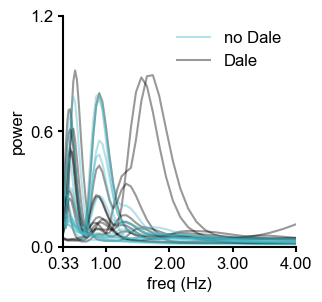

In [13]:

color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 0.4
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True
plt.figure(figsize = (3,3))

t1 = 300
t2 = 900
for i in range(24):
    if np.sum(data_list[i]['w_rec'][1]) <150:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        if legend1:
            legend1=False
    else:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1), 
                 color = color2,alpha=alpha, ls = ls2,label='no Dale' if legend2 else '',zorder =zorder2)
        if legend2:
            legend2=False
            
plt.xlim(0.33,4)
plt.legend()
plt.ylim(0,1.2)
plt.xticks([0.33,2,1,3,4])
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("power")
plt.savefig("../figures/Supp_b1", facecolor="white", transparent=False)
plt.yticks([0,0.6,1.2])



(array([6., 3., 0., 3., 3., 2., 4., 3.]),
 array([0.12622039, 0.22494097, 0.32366155, 0.42238213, 0.52110271,
        0.61982329, 0.71854387, 0.81726445, 0.91598503]),
 <BarContainer object of 8 artists>)

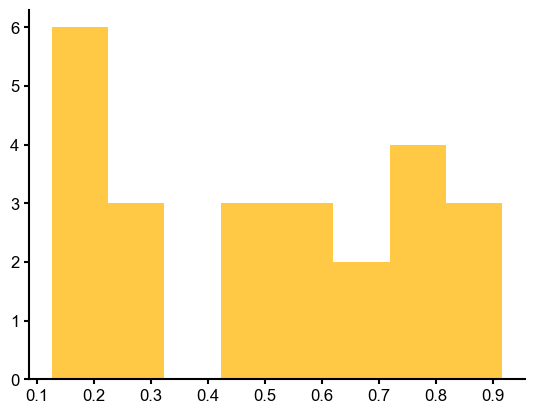

In [14]:
powers_b = []
for i in range(24):
    powers_b.append(np.max(np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1)))
np.mean(powers_b)
plt.hist(powers_b,bins=8)

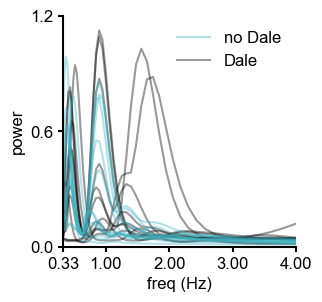

In [15]:

color1 = 'black'
color2 = pltcolors_alt[1]
ls1='-'
ls2='-'
alpha = 0.4
zorder1 = 1
zorder2 = 2
legend1 = True
legend2 = True
plt.figure(figsize = (3,3))
t1 = 1340
t2 = 1940
for i in range(24):
    if np.sum(data_list[i]['w_rec'][1]) <150:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1), 
                 color = color1,alpha=alpha, ls = ls1,label='Dale' if legend1 else '',zorder =zorder1)
        if legend1:
            legend1=False
    else:
        plt.plot(summary_settings['freqs_l'],np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1), 
                 color = color2,alpha=alpha, ls = ls2,label='no Dale' if legend2 else '',zorder =zorder2)
        if legend2:
            legend2=False
            
plt.xlim(0.33,4)
plt.xticks([0.33,2,1,3,4])
plt.yticks([0,0.6,1.2])


plt.legend()
plt.ylim(0,1.2)
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("power")
plt.savefig("../figures/Supp_b2", facecolor="white", transparent=False)


(array([2., 1., 3., 2., 2., 4., 4., 2., 2., 2.]),
 array([0.31489737, 0.39578309, 0.47666882, 0.55755454, 0.63844026,
        0.71932599, 0.80021171, 0.88109743, 0.96198316, 1.04286888,
        1.12375461]),
 <BarContainer object of 10 artists>)

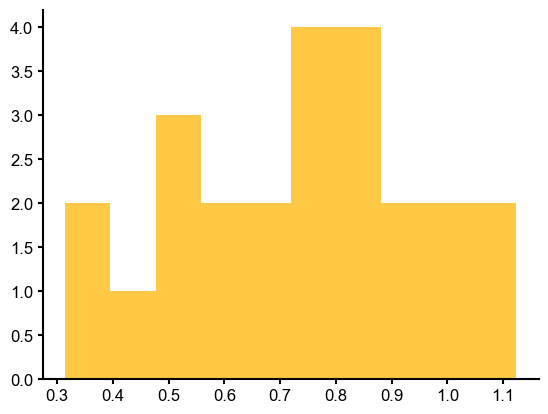

In [16]:
powers_d = []
for i in range(24):
    powers_d.append(np.max(np.mean(data_list[i]['post_spectrum'][:,t1:t2],axis=1)))
np.mean(powers_d)
plt.hist(powers_d)

In [ ]:
from scipy.stats import ranksums
ranksums(powers_b,powers_d,alternative='two-sided')

In [ ]:
print(np.mean(powers_b),np.mean(powers_d))

In [ ]:
plt.imshow(data_list[i]['post_spectrum'],aspect='auto')